### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Summary

### Data Overview
- Dataset: 150,000 ride bookings, 21 columns.
- Mix of categorical, numerical, and datetime fields.
- Created additional features: DateTime, Hour, Rush_Hour.

### Missing Values
- Avg VTAT: ~7% missing.
- Avg CTAT: ~32% missing.
- Cancellation & Incomplete ride details are sparse (6–18%).

### Univariate Insights
- **Booking Status**: Majority are Completed, followed by Cancelled and Incomplete.
- **Vehicle Type**: Go Sedan, Auto, and Bike dominate.
- **Booking Value & Ride Distance**: Right-skewed, with a few long/expensive rides.
- **Ratings**: Driver and Customer ratings concentrated between 4–5.

### Bivariate Insights
- **Time Trends**:
  - Clear rush-hour peaks (7–10 AM, 5–8 PM).
  - Higher cancellations during rush hours.
- **Payment Method vs Ride Distance**:
  - Certain methods (e.g., UPI, Cards) linked with longer rides compared to Cash.
- **Avg VTAT & CTAT vs Customer Rating**:
  - Longer turnaround times show a negative correlation with customer ratings.
- **Booking Status vs Time**:
  - Weekend vs weekday variations; cancellations spike at specific hours.

### Key Takeaways
- **Operational**: Rush hours = high demand + high cancellations.
- **Customer Experience**: Wait times directly affect ratings.
- **Payments**: Non-cash users often take longer rides.
- **Next Steps**: 
  - Feature engineering for predictive modeling (e.g., cancellation prediction).
  - Demand forecasting using time series.
  - Segmentation of customers/drivers based on behavior.


In [2]:
df = pd.read_csv('data/ncr_ride_bookings.csv')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [4]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'].astype(str))
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

In [5]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,DateTime
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000,150000
mean,2024-06-30 16:42:40.320000,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584,2024-07-01 07:14:41.251033344
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000,2024-01-01 00:19:34
25%,2024-03-31 00:00:00,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000,2024-03-31 22:55:36.249999872
50%,2024-07-01 00:00:00,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000,2024-07-01 09:24:52.500000
75%,2024-09-30 00:00:00,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000,2024-09-30 13:46:07.249999872
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,2024-12-30 23:36:11
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819,NaN


In [6]:
# handling null values
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
DateTime                                  0
dtype: int64

In [7]:
null_val = df.loc[df['Avg VTAT'].isna(), ['Date', 'Booking ID', 'Booking Status']].copy()
print('Null val dataframe shape', null_val.shape)
null_val.groupby(['Booking Status'])['Booking ID'].count().reset_index(name='Count')


Null val dataframe shape (10500, 3)


,Booking Status,Count
0,No Driver Found,10500


In [8]:
null_val = df.loc[df['Cancelled Rides by Customer'].isna()].copy()
print('Null val dataframe shape', null_val.shape)
# null_val.groupby(['Booking Status'])['Booking ID'].count().reset_index(name='Count')
null_val

Null val dataframe shape (139500, 22)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024-11-11 19:34:01
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI,2024-11-24 15:55:09
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash,2024-09-18 10:55:15
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI,2024-10-05 07:53:34


In [9]:
# So if columns like Cacnelled rides by customer, Reason for cancelling by customer, Cancelled rides by driver, Incomplete rides are missing or contain null values
# So the ride was successful and customer have reaced its destination
# seprate the data as succesful rides dataframe and unsuccessful rides
success_rides = df.loc[df['Booking Status'] == 'Completed', [
    'Date',
    'Time', 
    'Booking ID', 
    'Booking Status', 
    'Customer ID', 
    'Vehicle Type', 
    'Pickup Location',
    'Drop Location',
    'Avg VTAT',
    'Avg CTAT',
    'Booking Value',
    'Ride Distance',
    'Driver Ratings',
    'Customer Rating',
    'Payment Method']].copy()
success_rides.to_csv('Succesful_rides.csv', index=False)

In [10]:
unsuccessfull_rides = df.loc[df['Booking Status'] != 'Completed'].copy()
unsuccessfull_rides.isna().sum
unsuccessfull_rides.to_csv('unsuccessfull_rides.csv')

In [11]:
cancelled_rides_driver = unsuccessfull_rides.loc[unsuccessfull_rides['Cancelled Rides by Driver'].notna()].copy()
cancelled_rides_driver.dropna(axis=1, how='all', inplace=True)



In [12]:
driver_cancel_reason = cancelled_rides_driver['Driver Cancellation Reason'].value_counts().reset_index()
driver_cancel_reason


,Driver Cancellation Reason,count
0,Customer related issue,6837
1,The customer was coughing/sick,6751
2,Personal & Car related issues,6726
3,More than permitted people in there,6686


In [13]:
unsuccessfull_rides = unsuccessfull_rides.dropna(axis=1, how='all')
unsuccessfull_rides.to_csv('unsuccessfull_rides.csv')

In [14]:
unsuccessfull_rides[unsuccessfull_rides['Cancelled Rides by Customer'].notna()]

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Payment Method,DateTime
18,2024-11-24,09:07:10,"""CNR6126048""",Cancelled by Customer,"""CID1060329""",eBike,Kashmere Gate,Anand Vihar,12.4,NaN,1.0,Driver is not moving towards pickup location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-24 09:07:10
39,2024-09-10,13:02:42,"""CNR4218487""",Cancelled by Customer,"""CID3037053""",Bike,Noida Extension,Udyog Vihar Phase 4,11.0,NaN,1.0,Driver is not moving towards pickup location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-10 13:02:42
46,2024-08-02,07:17:07,"""CNR4862806""",Cancelled by Customer,"""CID7875150""",Auto,Shastri Park,Anand Vihar ISBT,11.3,NaN,1.0,Driver asked to cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-02 07:17:07
62,2024-02-09,11:15:59,"""CNR2497989""",Cancelled by Customer,"""CID5007066""",Auto,Karkarduma,IGI Airport,16.6,NaN,1.0,Driver is not moving towards pickup location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-09 11:15:59
78,2024-11-25,08:29:14,"""CNR2601752""",Cancelled by Customer,"""CID9283370""",Go Sedan,Sadar Bazar Gurgaon,Indraprastha,12.0,NaN,1.0,Driver asked to cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-25 08:29:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149943,2024-05-01,16:39:56,"""CNR3486851""",Cancelled by Customer,"""CID7572575""",Bike,IGNOU Road,Kadarpur,7.8,NaN,1.0,Wrong Address,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 16:39:56
149952,2024-04-10,09:33:06,"""CNR8257559""",Cancelled by Customer,"""CID1017725""",Auto,Pitampura,IGNOU Road,6.4,NaN,1.0,Driver asked to cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-10 09:33:06
149956,2024-10-10,18:34:10,"""CNR6030764""",Cancelled by Customer,"""CID6873715""",Go Sedan,Hauz Rani,Dilshad Garden,13.2,NaN,1.0,Driver is not moving towards pickup location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-10 18:34:10
149963,2024-02-04,10:51:54,"""CNR4272547""",Cancelled by Customer,"""CID2998831""",Auto,Jahangirpuri,Lal Quila,9.7,NaN,1.0,Driver is not moving towards pickup location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-04 10:51:54


In [15]:
customer_cancel_reason = unsuccessfull_rides[unsuccessfull_rides['Reason for cancelling by Customer'].notna()].copy()
customer_cancel_reason.dropna(axis=1, how='all', inplace=True)
customer_cancel_reason

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,DateTime
18,2024-11-24,09:07:10,"""CNR6126048""",Cancelled by Customer,"""CID1060329""",eBike,Kashmere Gate,Anand Vihar,12.4,1.0,Driver is not moving towards pickup location,2024-11-24 09:07:10
39,2024-09-10,13:02:42,"""CNR4218487""",Cancelled by Customer,"""CID3037053""",Bike,Noida Extension,Udyog Vihar Phase 4,11.0,1.0,Driver is not moving towards pickup location,2024-09-10 13:02:42
46,2024-08-02,07:17:07,"""CNR4862806""",Cancelled by Customer,"""CID7875150""",Auto,Shastri Park,Anand Vihar ISBT,11.3,1.0,Driver asked to cancel,2024-08-02 07:17:07
62,2024-02-09,11:15:59,"""CNR2497989""",Cancelled by Customer,"""CID5007066""",Auto,Karkarduma,IGI Airport,16.6,1.0,Driver is not moving towards pickup location,2024-02-09 11:15:59
78,2024-11-25,08:29:14,"""CNR2601752""",Cancelled by Customer,"""CID9283370""",Go Sedan,Sadar Bazar Gurgaon,Indraprastha,12.0,1.0,Driver asked to cancel,2024-11-25 08:29:14
...,...,...,...,...,...,...,...,...,...,...,...,...
149943,2024-05-01,16:39:56,"""CNR3486851""",Cancelled by Customer,"""CID7572575""",Bike,IGNOU Road,Kadarpur,7.8,1.0,Wrong Address,2024-05-01 16:39:56
149952,2024-04-10,09:33:06,"""CNR8257559""",Cancelled by Customer,"""CID1017725""",Auto,Pitampura,IGNOU Road,6.4,1.0,Driver asked to cancel,2024-04-10 09:33:06
149956,2024-10-10,18:34:10,"""CNR6030764""",Cancelled by Customer,"""CID6873715""",Go Sedan,Hauz Rani,Dilshad Garden,13.2,1.0,Driver is not moving towards pickup location,2024-10-10 18:34:10
149963,2024-02-04,10:51:54,"""CNR4272547""",Cancelled by Customer,"""CID2998831""",Auto,Jahangirpuri,Lal Quila,9.7,1.0,Driver is not moving towards pickup location,2024-02-04 10:51:54


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

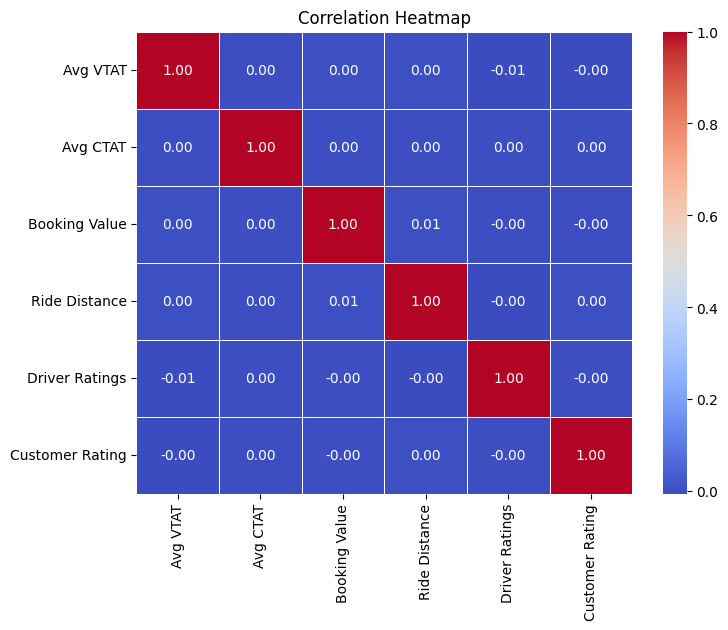

In [17]:
# Relation between variables

corr_matrix = success_rides.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths='0.5')
plt.title('Correlation Heatmap')
plt.show()

## Univariate Analysis
Study of single variable

Distribution of numerical variables (Avg VTAT, ride durations, fare if available).

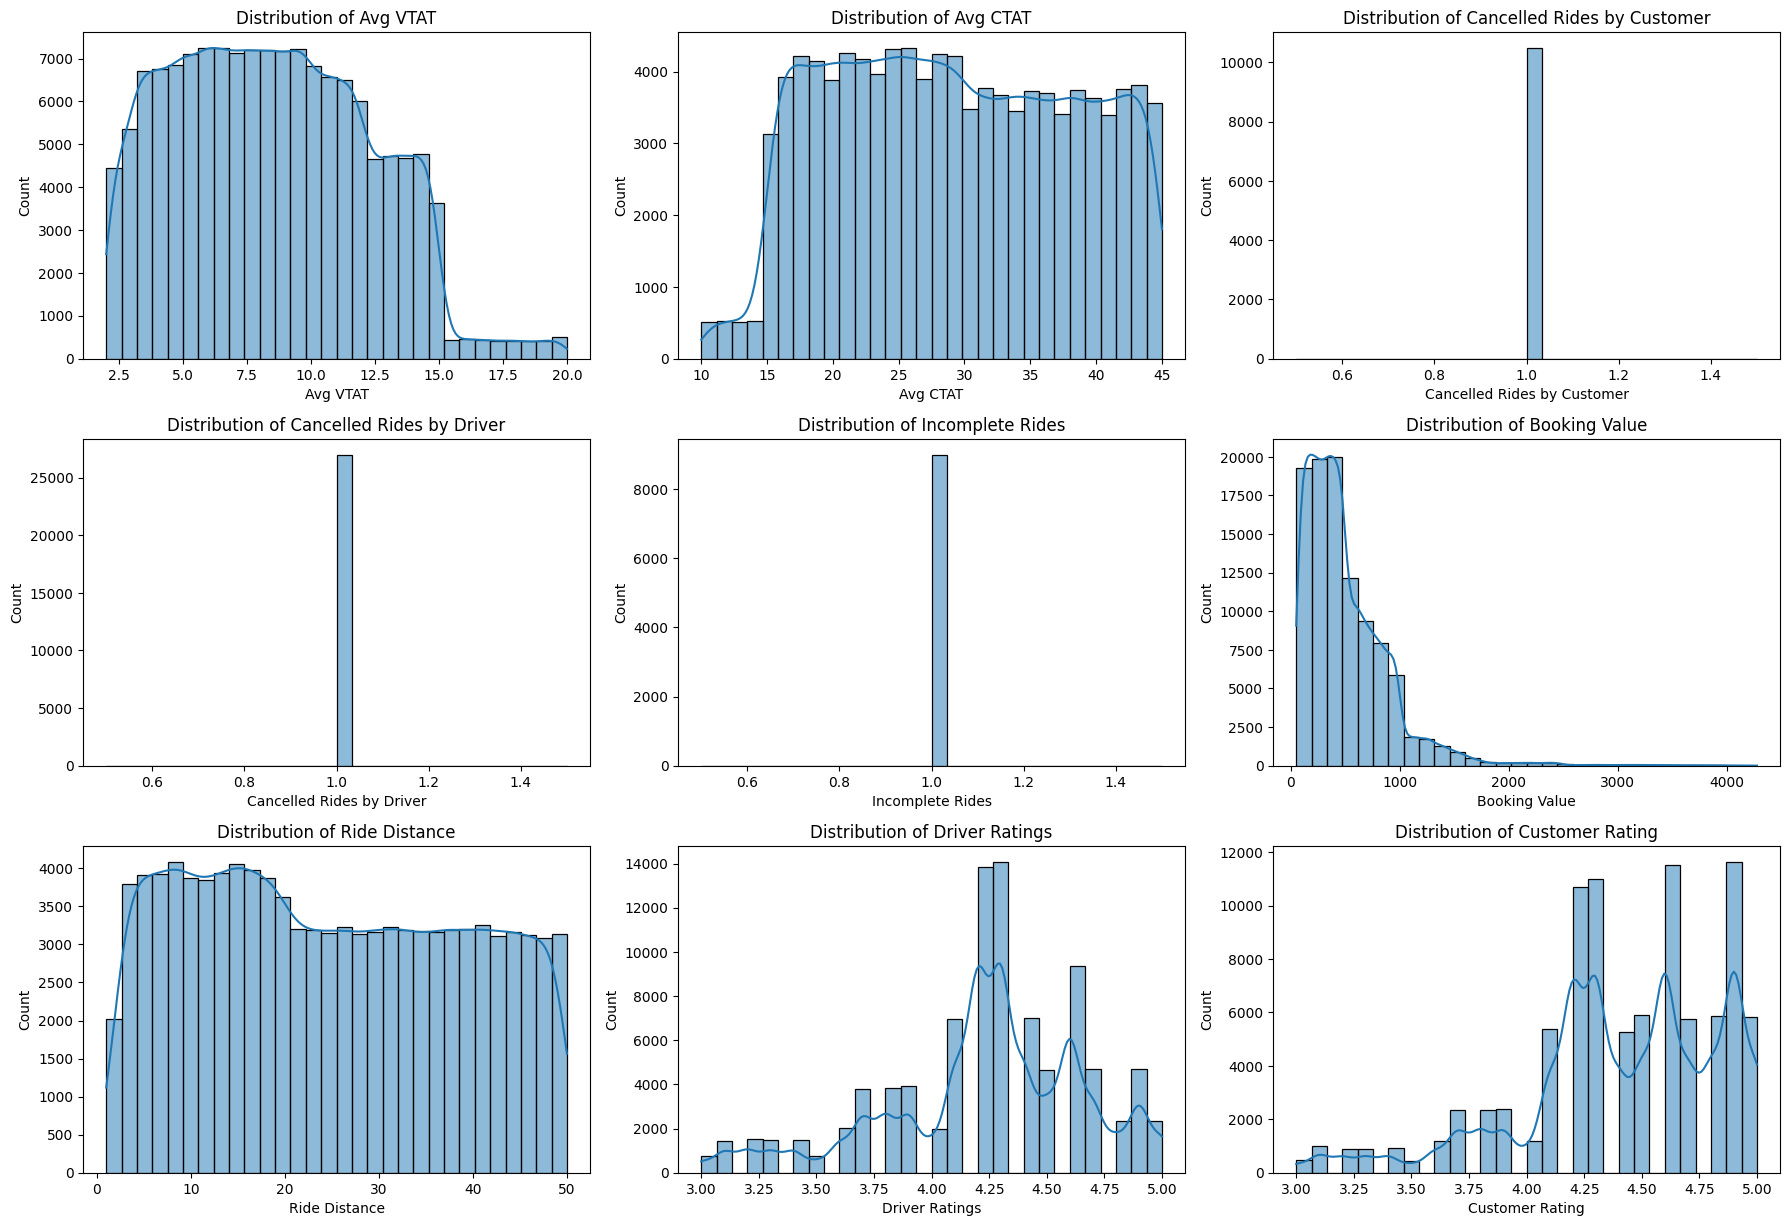

In [18]:
only_numeric_col = ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating']



n = len(only_numeric_col)
rows = (n // 3) + 1
fig, axes = plt.subplots(rows, 3, figsize=(18, rows*4))
axes = axes.flatten()

for i, col in enumerate(only_numeric_col):
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# hide empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
# plt.suptitle('Distribution', size=20)
plt.tight_layout()
plt.show()

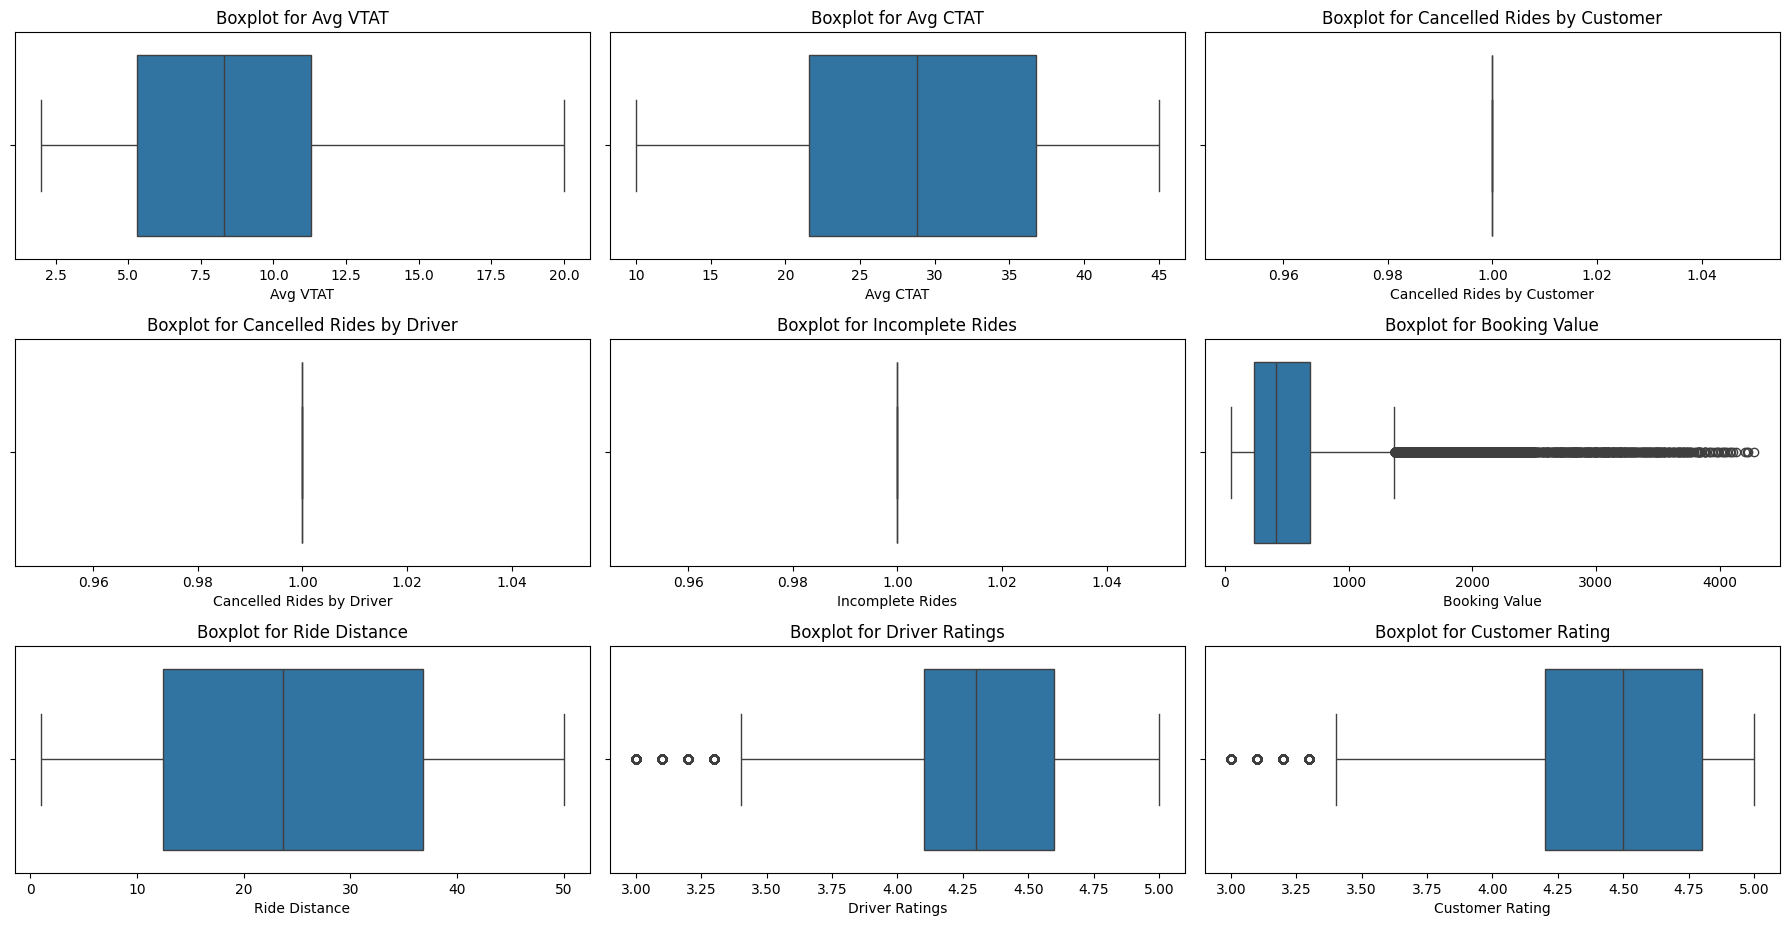

In [19]:
#boxplots
n = len(only_numeric_col)

rows = (n // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3))
axes = axes.flatten()

for i, col in enumerate(only_numeric_col):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# plt.suptitle('BoxPlot')
plt.tight_layout()
plt.show()

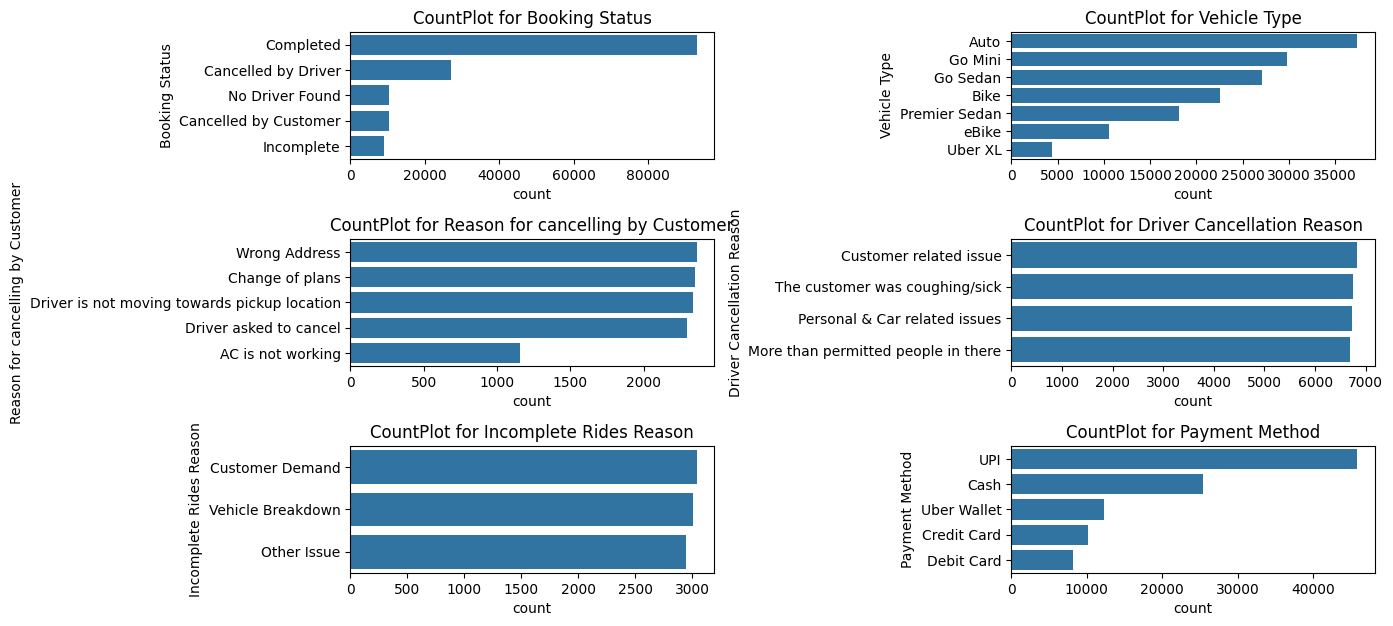

In [20]:
cat_cols = [
    "Booking Status", "Vehicle Type",
    "Reason for cancelling by Customer", "Driver Cancellation Reason",
    "Incomplete Rides Reason", "Payment Method"
]

n = len(cat_cols)
rows = (n // 2) + 1
fig, axes = plt.subplots(rows, 2, figsize=(14, rows*2))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'CountPlot for {col}')
        
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

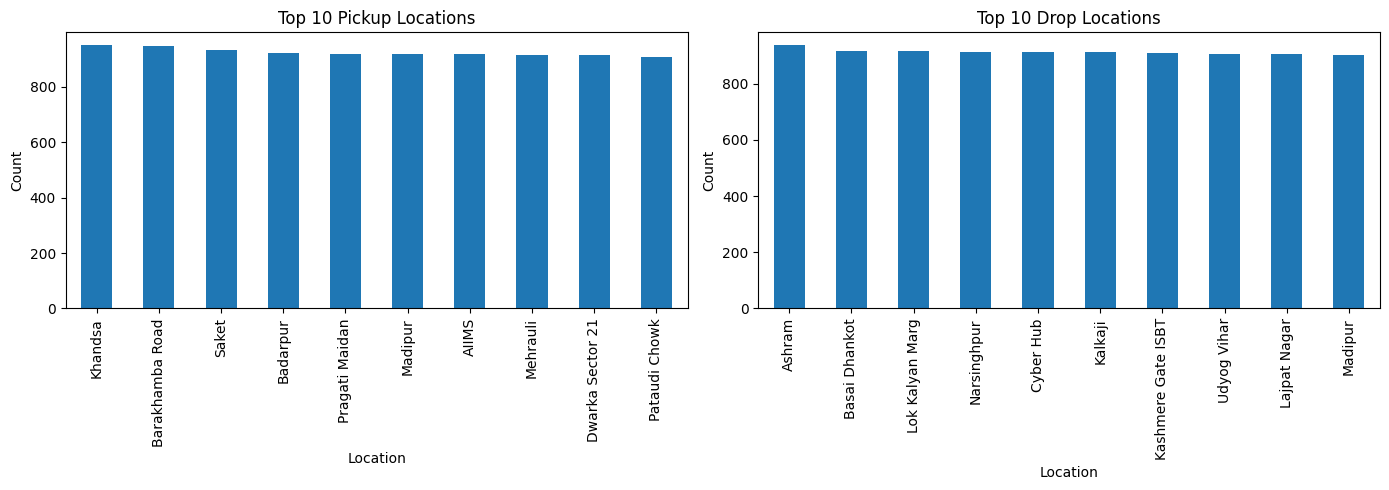

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

df["Pickup Location"].value_counts().head(10).plot(kind="bar", ax=axes[0])
axes[0].set_title("Top 10 Pickup Locations")
axes[0].set_xlabel("Location")
axes[0].set_ylabel("Count")

df["Drop Location"].value_counts().head(10).plot(kind="bar", ax=axes[1])
axes[1].set_title("Top 10 Drop Locations")
axes[1].set_xlabel("Location")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## Time Series Exploration

In [22]:
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day

In [23]:
by_month_trend = df.groupby(['Month'])['Booking ID'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

In [24]:
# df.groupby(['Month', 'Day']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df.groupby(['Day'])['Booking ID'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Day,Count
15,16,5106
8,9,5039
3,4,5038
0,1,5036
5,6,5019
4,5,5017
13,14,5006
25,26,4989
16,17,4982
2,3,4979


In [25]:
df['day_of_week'] = df['Date'].dt.day_of_week

In [26]:
month_day_trend = df.groupby(['Month', 'day_of_week'])['Booking ID'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

In [27]:
month_day_trend.head()

,Month,day_of_week,Count
68,November,5,2149
67,November,4,2135
47,June,5,2134
20,December,6,2109
37,July,2,2109


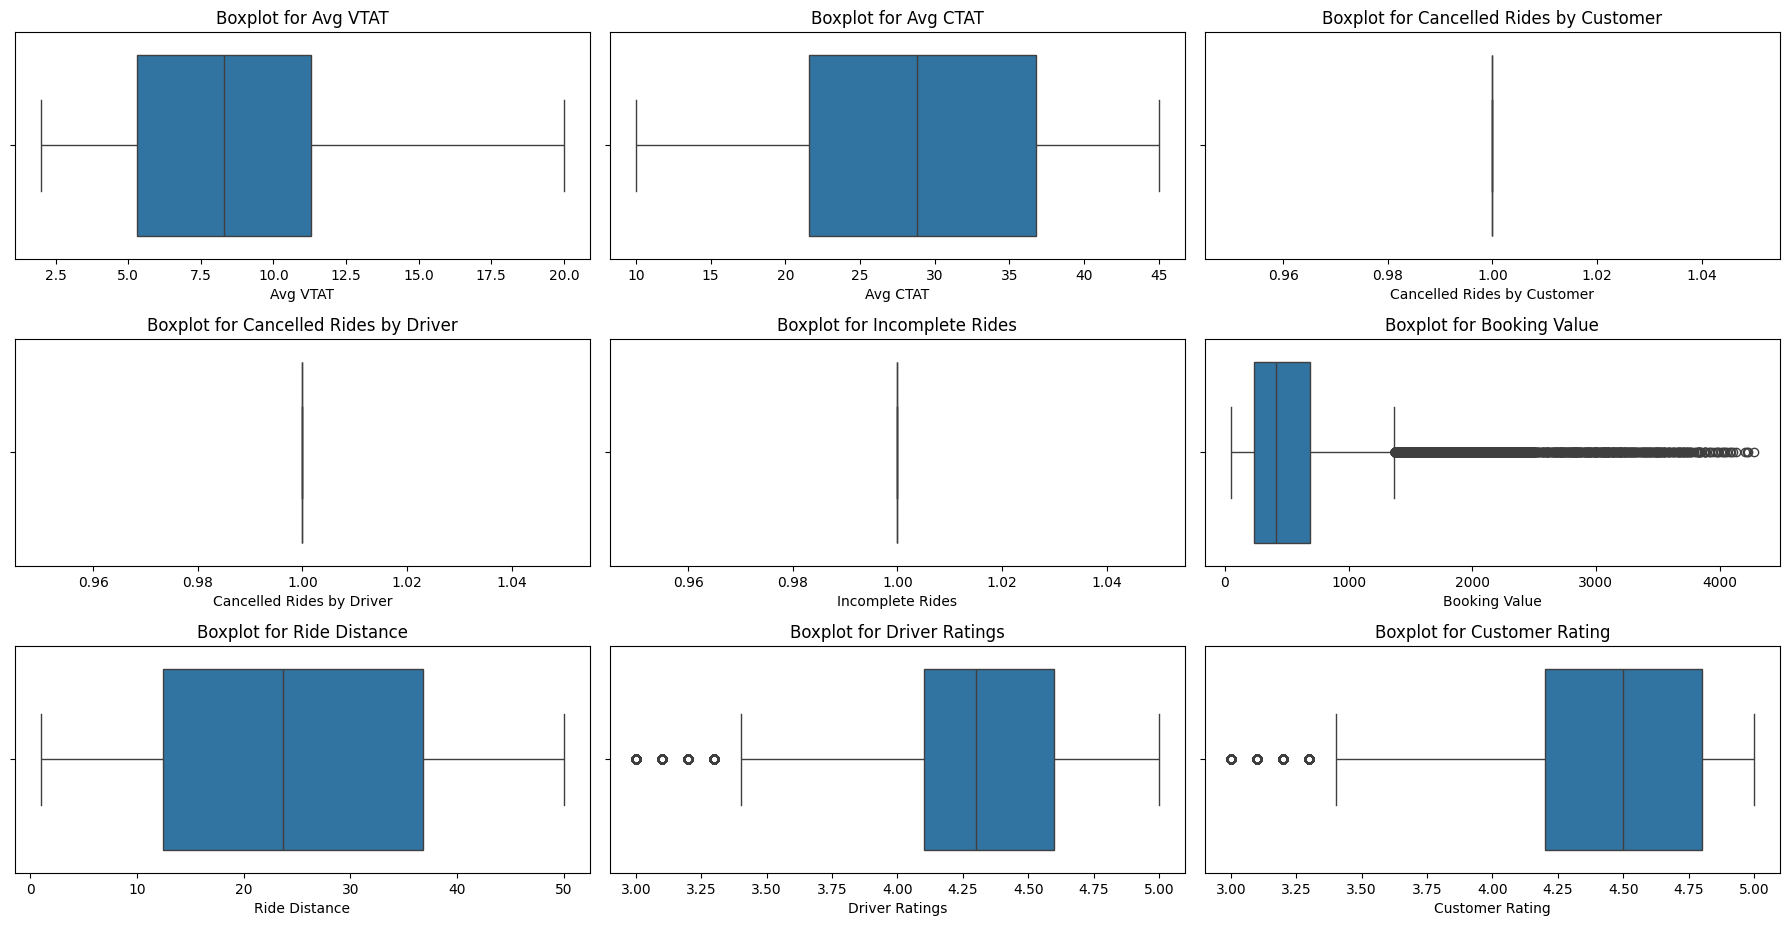

In [28]:
#boxplots
n = len(only_numeric_col)

rows = (n // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3))
axes = axes.flatten()

for i, col in enumerate(only_numeric_col):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# plt.suptitle('BoxPlot')
plt.tight_layout()
plt.show()

In [29]:
str.capitalize

<method 'capitalize' of 'str' objects>

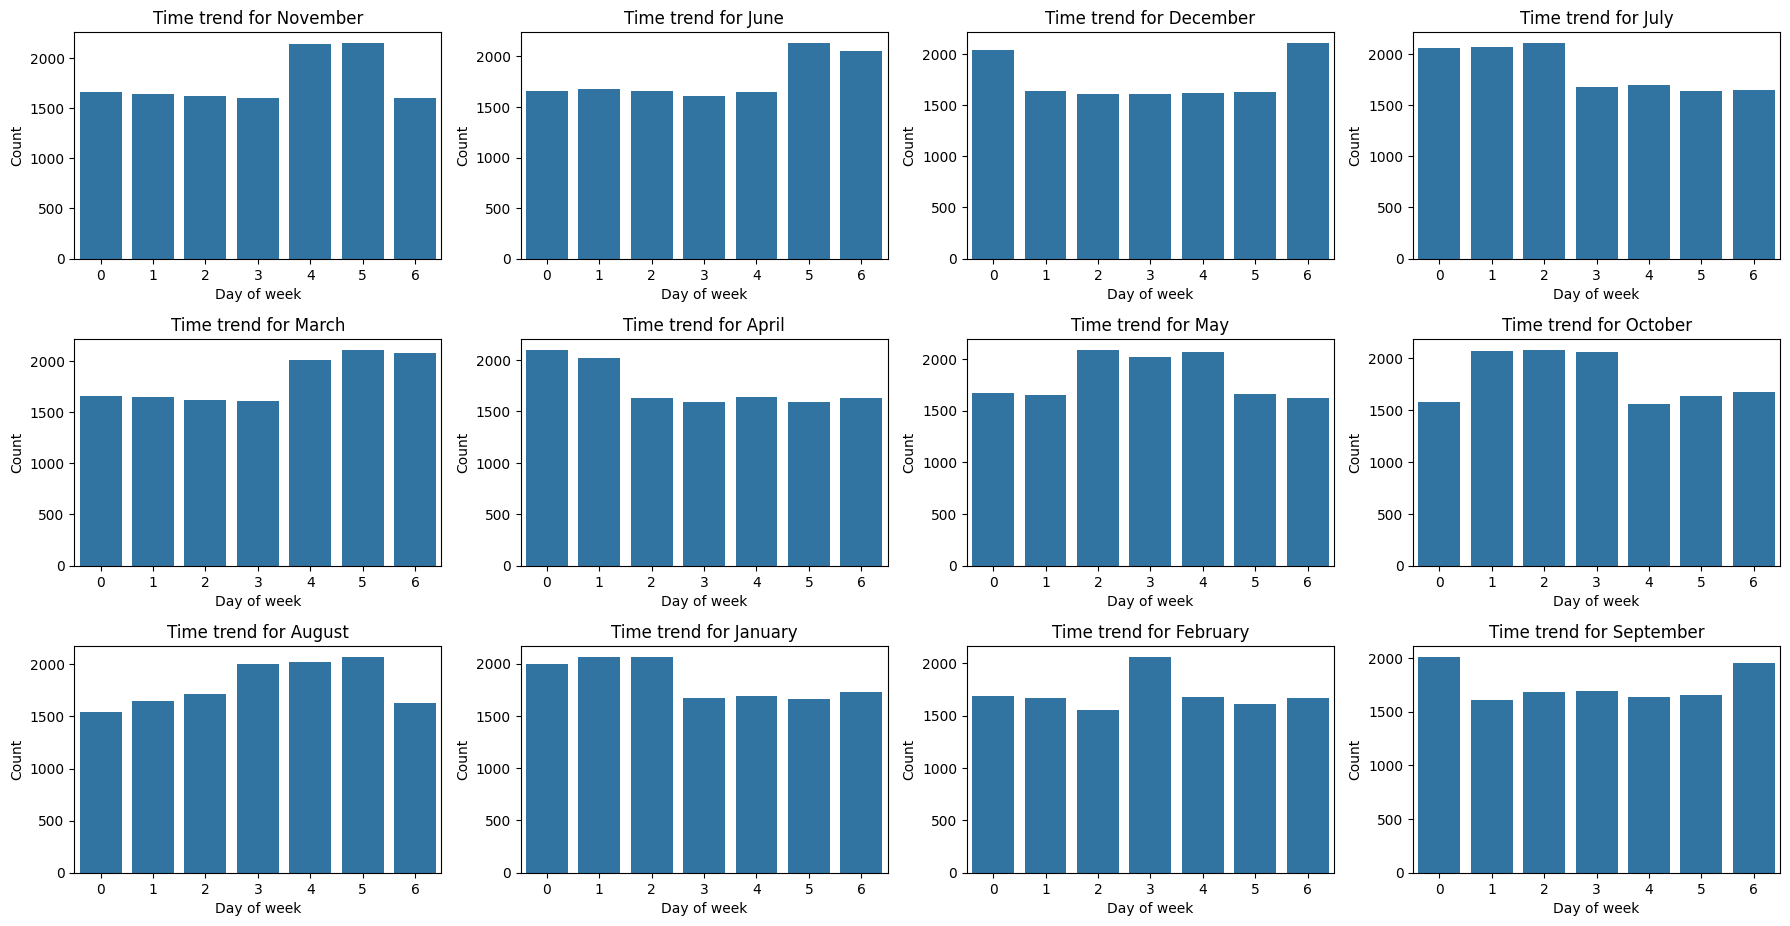

In [30]:
n = month_day_trend['Month'].nunique()  

rows = (n // 4) + 1
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3))
axes = axes.flatten()

for i, month in enumerate(month_day_trend['Month'].unique()):
    month_data = month_day_trend[month_day_trend['Month'] == month]
    sns.barplot(x=month_data['day_of_week'],y=month_data['Count'], ax=axes[i])
    axes[i].set_title(f'Time trend for {month.capitalize()}')
    axes[i].set_xlabel('Day of week')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
df.drop(columns=['Time'], inplace=True)

In [43]:
df['Hour'] = df['DateTime'].dt.hour
df.head()

,Date,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Month,Day,day_of_week,Hour
0,2024-03-23,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,March,23,5,12
1,2024-11-29,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,...,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,November,29,4,18
2,2024-08-23,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,...,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,August,23,4,8
3,2024-10-21,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,...,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,October,21,0,17
4,2024-09-16,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,...,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,September,16,0,22


In [44]:
df.groupby(['Hour'])['Booking ID'].count().reset_index()

,Hour,Booking ID
0,0,1373
1,1,1360
2,2,1339
3,3,1383
4,4,1321
5,5,2786
6,6,4160
7,7,5450
8,8,6861
9,9,8234


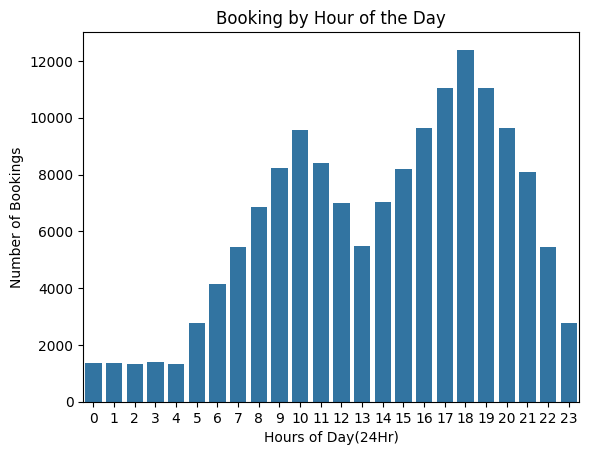

In [46]:
# plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', order=sorted(df['Hour'].unique()))
plt.title('Booking by Hour of the Day')
plt.xlabel('Hours of Day(24Hr)')
plt.ylabel('Number of Bookings')
plt.show()


       Rush_hour  Booking ID
0  Non-Rush Hour       75760
1      Rush Hour       74240


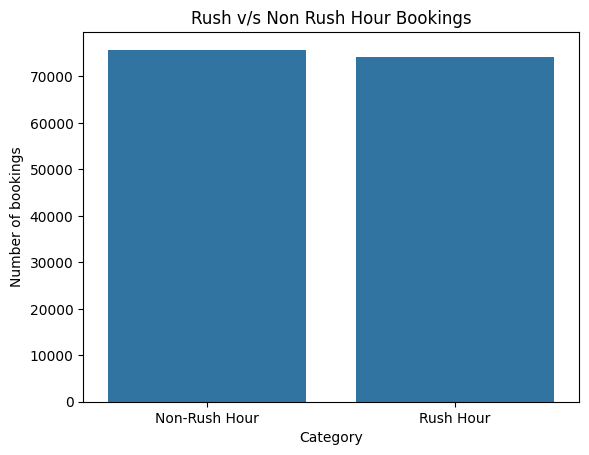

In [52]:
# Rush and Non rush Flags
def rush_hour_flag(hour):
    return 'Rush Hour' if (7 <= hour <= 10) or (17 <= hour <= 20) else 'Non-Rush Hour'

df['Rush_hour'] = df['Hour'].apply(rush_hour_flag)


print(df.groupby(['Rush_hour'])['Booking ID'].count().reset_index())


sns.countplot(x='Rush_hour', data=df)
plt.title('Rush v/s Non Rush Hour Bookings')
plt.xlabel('Category')
plt.ylabel('Number of bookings')
plt.show()

In [53]:
df.head()

,Date,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,...,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Month,Day,day_of_week,Hour,Rush_hour
0,2024-03-23,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,March,23,5,12,Non-Rush Hour
1,2024-11-29,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,...,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,November,29,4,18,Rush Hour
2,2024-08-23,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,...,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,August,23,4,8,Rush Hour
3,2024-10-21,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,...,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,October,21,0,17,Rush Hour
4,2024-09-16,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,...,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,September,16,0,22,Non-Rush Hour


In [57]:
df.groupby(['Payment Method'])['Ride Distance'].mean().reset_index().round(2)

,Payment Method,Ride Distance
0,Cash,24.67
1,Credit Card,24.65
2,Debit Card,24.61
3,UPI,24.61
4,Uber Wallet,24.69


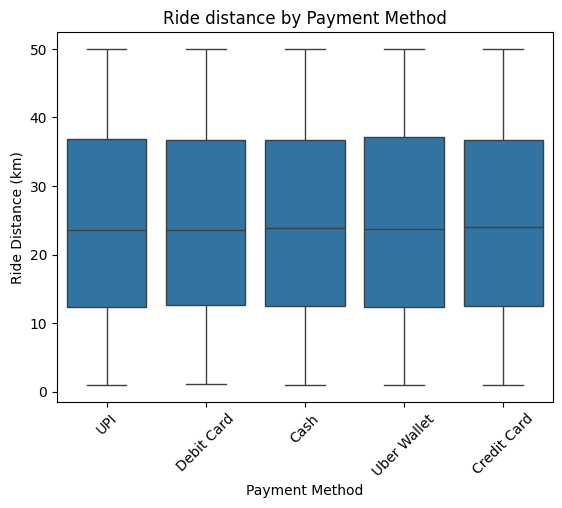

In [58]:
plt.figure()
sns.boxplot(x='Payment Method', y='Ride Distance', data=df)
plt.title('Ride distance by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Ride Distance (km)')
plt.xticks(rotation=45)
plt.show()

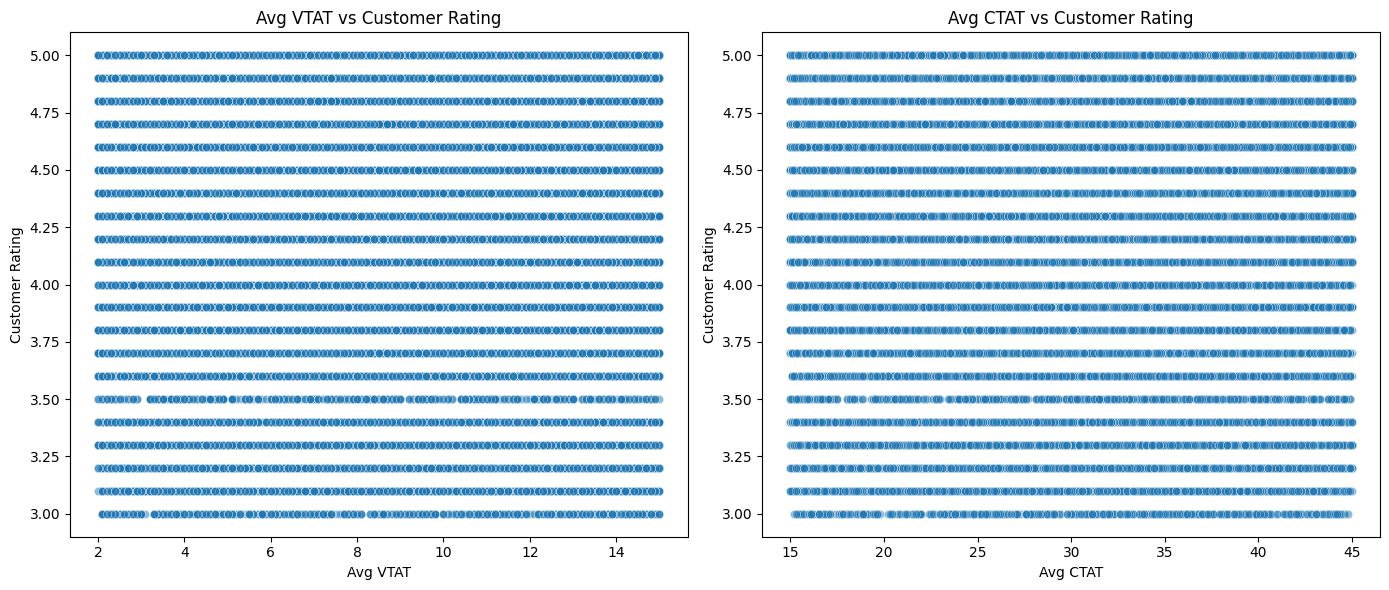

,Avg VTAT,Avg CTAT,Customer Rating
Avg VTAT,1.000,0.062,-0.004
Avg CTAT,0.062,1.000,0.001
Customer Rating,-0.004,0.001,1.000


In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Avg VTAT vs Customer Rating
sns.scatterplot(x="Avg VTAT", y="Customer Rating", data=df, alpha=0.5, ax=axes[0])
axes[0].set_title("Avg VTAT vs Customer Rating")

# Avg CTAT vs Customer Rating
sns.scatterplot(x="Avg CTAT", y="Customer Rating", data=df, alpha=0.5, ax=axes[1])
axes[1].set_title("Avg CTAT vs Customer Rating")

plt.tight_layout()
plt.show()

# Correlation check
df[["Avg VTAT", "Avg CTAT", "Customer Rating"]].corr().round(3)


# EDA Summary

### Data Overview
- Dataset: 150,000 ride bookings, 21 columns.
- Mix of categorical, numerical, and datetime fields.
- Created additional features: DateTime, Hour, Rush_Hour.

### Missing Values
- Avg VTAT: ~7% missing.
- Avg CTAT: ~32% missing.
- Cancellation & Incomplete ride details are sparse (6–18%).

### Univariate Insights
- **Booking Status**: Majority are Completed, followed by Cancelled and Incomplete.
- **Vehicle Type**: Go Sedan, Auto, and Bike dominate.
- **Booking Value & Ride Distance**: Right-skewed, with a few long/expensive rides.
- **Ratings**: Driver and Customer ratings concentrated between 4–5.

### Bivariate Insights
- **Time Trends**:
  - Clear rush-hour peaks (7–10 AM, 5–8 PM).
  - Higher cancellations during rush hours.
- **Payment Method vs Ride Distance**:
  - Certain methods (e.g., UPI, Cards) linked with longer rides compared to Cash.
- **Avg VTAT & CTAT vs Customer Rating**:
  - Longer turnaround times show a negative correlation with customer ratings.
- **Booking Status vs Time**:
  - Weekend vs weekday variations; cancellations spike at specific hours.

### Key Takeaways
- **Operational**: Rush hours = high demand + high cancellations.
- **Customer Experience**: Wait times directly affect ratings.
- **Payments**: Non-cash users often take longer rides.
- **Next Steps**: 
  - Feature engineering for predictive modeling (e.g., cancellation prediction).
  - Demand forecasting using time series.
  - Segmentation of customers/drivers based on behavior.
